In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [3]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test)=imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [5]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [7]:
# Inspect the shape of the data
x_train.shape


(25000,)

In [8]:
# Display the first dataset element input
# Notice encoding
x_train[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [9]:
# Display the first dataset element output
y_train[0]


1

#### Load dataset with different options

In [10]:
# Load the dataset with defaults

imdb.load_data(path=imdb.npz
              index_from=3)
# ~/.keras/dataset/

AttributeError: module 'tensorflow_core.keras.datasets.imdb' has no attribute 'npz'

In [ ]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_worls=500)
#Indices de palabras menores a 500


In [ ]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10, num_worls=1000, ovv_chart=2)
#SKIPTOP Elimina las 10 palabras más repetidas
#OVV_CHART

In [ ]:
# Limit the sequence lengths to 500 using maxlen
imdb.load_data(maxlen=500)

In [ ]:
# Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_chart=1)


#### Explore the dataset word index

In [14]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [15]:
# View the word index as a dictionary,
# accounting for index_from.
index_from=3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}

In [17]:
# Retrieve a specific word's index

imdb_word_index['simpsonian']

52256

In [18]:
# View an input sentence

imdb_word_index['the']


4

In [22]:
inv_get_word_index= {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index> index_from]

NameError: name 'inv_imdb_word_index' is not defined

In [19]:
# Get the sentiment value



---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [3]:
# Load the imdb data set

import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train), (x_test, y_test) =  imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Preprocess the data with padding

In [28]:
# Inspect the input data shape
x_train.shape 


(25000,)

In [29]:
# Pad the inputs to the maximum length using maxlen
padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')


In [30]:
# Inspect the output data shape
padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [31]:
# Import numpy 

import numpy as np

In [32]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train= np.expand_dims(x_train, -1)

In [33]:
# Create a Masking layer 
tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)


ValueError: setting an array element with a sequence.

In [27]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

NameError: name 'masking_layer' is not defined

In [34]:
# Look at the dataset

#tf_x_train
mask_x_train

NameError: name 'mask_x_train' is not defined

In [ ]:
# Look at the ._keras_mask for the dataset

mask_x_train._keras_mask

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [2]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)


In [5]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0],[1],[5],[500]]])


sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings 

<tf.Tensor: id=17, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.0069194 , -0.00051308, -0.02257497,  0.03406408,
           0.04044045, -0.03777949,  0.04580034, -0.02451481,
           0.03691988,  0.01943647,  0.001205  ,  0.01804275,
           0.02926356, -0.03445012, -0.00934314, -0.02872245]],

        [[ 0.04897299, -0.01890786,  0.00371199,  0.02906594,
          -0.00824763, -0.04620586, -0.04369418, -0.00364195,
          -0.03458989, -0.00050274,  0.00542338,  0.00809407,
           0.03215338, -0.01320235, -0.04520104, -0.02037505]],

        [[-0.00744956,  0.04699873, -0.01853855,  0.0075155 ,
           0.02800563, -0.03232055, -0.03598322, -0.04918769,
          -0.00998803, -0.01107083, -0.0108227 ,  0.03720902,
           0.00965389,  0.04553646,  0.01693473, -0.01860042]],

        [[ 0.00470209, -0.0357327 ,  0.03182837,  0.01844818,
          -0.00860488, -0.03236121,  0.03826029,  0.02279893,
           0.01501941, -0.03677896,  0.01798793,  0.01079249,

In [6]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()


[array([[ 0.0069194 , -0.00051308, -0.02257497, ..., -0.03445012,
         -0.00934314, -0.02872245],
        [ 0.04897299, -0.01890786,  0.00371199, ..., -0.01320235,
         -0.04520104, -0.02037505],
        [-0.01592297,  0.00154154,  0.04568121, ..., -0.03053335,
         -0.04904708,  0.03295827],
        ...,
        [ 0.03349483,  0.03034044, -0.02474043, ...,  0.02177416,
         -0.03325158,  0.02347883],
        [ 0.01429157,  0.02229356,  0.03058967, ..., -0.04349237,
          0.03069759,  0.03156577],
        [ 0.00470209, -0.0357327 ,  0.03182837, ...,  0.04793593,
         -0.01802794,  0.02770462]], dtype=float32)]

In [7]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14,:]

array([-0.01310291,  0.00847652, -0.02740347,  0.02939374, -0.02005616,
        0.0155687 , -0.04428743,  0.03473911,  0.02963928, -0.00611085,
       -0.04729985,  0.02734074,  0.04625619, -0.04110263, -0.02378829,
       -0.03825284], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [8]:
##### Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero = True)

In [11]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: id=41, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [2]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test)= get_and_pad_imdb_dataset()


17465344/17464789 [==============================] - 0s 0us/step


In [4]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [5]:
# Get the word index

imdb_word_index =  get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
# Swap the keys and values of the word index
inv_imdb_word_index = {value : key for key, value in imdb_word_index.items()}


In [8]:
# View the first dataset example sentence
[inv_imdb_word_index[index] for index in x_train[100] if index > 2]


['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [10]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values()) 

In [11]:
# Specify an embedding dimension
embedding_dim=16


In [ ]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model =tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(unit=1, acrivation='sigmoid')
])

In [14]:
# Functional API refresher: use the Model to build the same model
review_sequence = tf.keras.Input((None, ))
embedding_sequence = tf.keras.layers.Embedding(input_dim = max_index_value+1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs = review_sequence, outputs=positive_probability)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [17]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy',  metrics=['accuracy'], optimizer='adam')

In [18]:
# Train the model using .fit(), savng its history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.6899 - accuracy: 0.5465 - val_loss: 0.0175 - val_accuracy: 0.5781
Epoch 2/5
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.6678 - accuracy: 0.6834 - val_loss: 0.0166 - val_accuracy: 0.7203
Epoch 3/5
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.6192 - accuracy: 0.7598 - val_loss: 0.0151 - val_accuracy: 0.7453
Epoch 4/5
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.5641 - accuracy: 0.7987 - val_loss: 0.0138 - val_accuracy: 0.7953
Epoch 5/5
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.5141 - accuracy: 0.8215 - val_loss: 0.0127 - val_accuracy: 0.8016


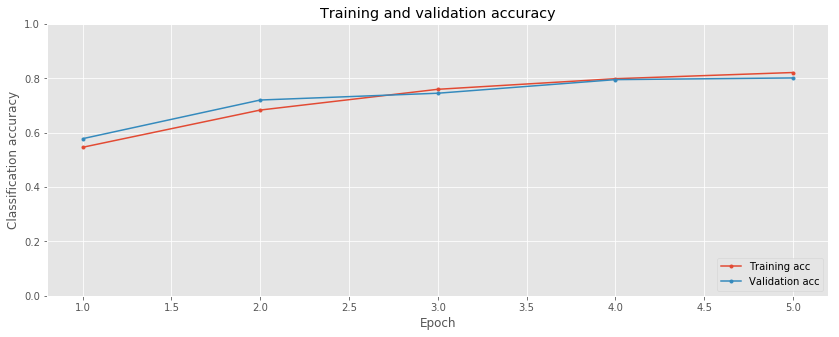

In [19]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [20]:
# Retrieve the embedding layer's weights from the trained model
weights= model.layers[1].get_weights()[0]


In [21]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

FileNotFoundError: [Errno 2] No such file or directory: 'data/vecs.tsv'

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [8]:
# Create a SimpleRNN layer and test it

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [9]:
# Note that only the final cell output is returned
sequence = tf.constant([[[1., 1.], [2., 2.], [56., -100.]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: id=121, shape=(1, 16), dtype=float32, numpy=
array([[ 0.9999915 , -1.        ,  1.        , -1.        ,  1.        ,
        -1.        ,  1.        , -1.        ,  1.        , -1.        ,
        -1.        ,  1.        , -1.        ,  0.99999964,  1.        ,
         1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [11]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [12]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

17465344/17464789 [==============================] - 0s 0us/step


In [13]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [14]:
# Get the word index using get_imdb_word_index()
imdb_word_index = get_imdb_word_index()


1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [18]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [33]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_index_value+1,output_dim = embedding_dim, mask_zero = True),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


#### Compile and fit the model

In [35]:
# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [36]:
# Fit the model and save its training history
history = model.fit(x_train, y_train, epochs=3, batch_size=32) 

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 524s 21ms/sample - loss: 0.4013 - accuracy: 0.8176
Epoch 2/3
25000/25000 [==============================] - 495s 20ms/sample - loss: 0.2261 - accuracy: 0.9140
Epoch 3/3
25000/25000 [==============================] - 467s 19ms/sample - loss: 0.1763 - accuracy: 0.9362


#### Plot learning curves

In [37]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: 'val_accuracy'

#### Make predictions with the model

In [ ]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_index= {value: key for key value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index>2]

In [ ]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

In [ ]:
# Get the corresponding label
y_test[0]


---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [4]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [5]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words = 5000, maxlen=250)

17465344/17464789 [==============================] - 0s 0us/step


In [7]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [9]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(num_words=5000)

1646592/1641221 [==============================] - 0s 0us/step


#### Build stacked and bidirectional recurrent models

In [13]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [16]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(units=12, return_sequences=True),
    tf.keras.layers.LSTM(units=12, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [18]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8), merge_mode='sum', backward_layer= tf.keras.layers.GRU(units=8, go_backwards= True)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])



In [21]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer
model =  tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8, return_sequences= True), merge_mode='concat'),
    tf.keras.layers.GRU(units=8, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
    
])


#### Compile and fit the model

In [22]:
# Compile the model

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
# Train the model, saving its history
history = model.fit(x_train, y_train, epochs=3, batch_size=32)


Train on 25000 samples
Epoch 1/3
   32/25000 [..............................] - ETA: 5s

TypeError: 'NoneType' object is not callable

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);